# Importando a base de dados

In [206]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns#versão avançada do matplotlib para pandas
import matplotlib as plt
plt.rc('figure', figsize = (20,10))
print('Concluido')

Concluido


In [207]:
dados = pd.read_csv('dados/tips.csv',sep = ',')

In [208]:
dados

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


#  Tradução

In [209]:
dados.columns#verificando nome das colunas

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [210]:
index = {
'total_bill' : 'total', 
'tip':'gorjeta', 
'dessert':'sobremesa', 
'day':'dia_da_semana', 
'time':'horario', 
'size':'num_de_clientes'
}

In [211]:
type(index)

dict

In [212]:
gorjetas = dados.rename(columns = index)#renomeando as colunas a partir de um dict
gorjetas

,total,gorjeta,sobremesa,dia_da_semana,horario,num_de_clientes
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


In [213]:
gorjetas['sobremesa'].unique()#.unique verifica quais valores são únicos

array(['No', 'Yes'], dtype=object)

In [214]:
sino = {
'No':str('Não'),
'Yes':'Sim'
}
sino

{'No': 'Não', 'Yes': 'Sim'}

In [215]:
gorjetas['sobremesa'] = gorjetas['sobremesa'].map(sino)#.map faz uma substituição a partir de um dict, x = x salva as mudanças
gorjetas

,total,gorjeta,sobremesa,dia_da_semana,horario,num_de_clientes
0,16.99,1.01,Não,Sun,Dinner,2
1,10.34,1.66,Não,Sun,Dinner,3
2,21.01,3.50,Não,Sun,Dinner,3
3,23.68,3.31,Não,Sun,Dinner,2
4,24.59,3.61,Não,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,Não,Sat,Dinner,3
240,27.18,2.00,Sim,Sat,Dinner,2
241,22.67,2.00,Sim,Sat,Dinner,2
242,17.82,1.75,Não,Sat,Dinner,2


In [216]:
gorjetas['dia_da_semana'].unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [217]:
dias = {
'Sun':'Dom',
'Sat':'Sab',
'Thur':'Qui',
'Fri':'Sex'
}

In [218]:
gorjetas['dia_da_semana'] = gorjetas['dia_da_semana'].map(dias)
gorjetas

,total,gorjeta,sobremesa,dia_da_semana,horario,num_de_clientes
0,16.99,1.01,Não,Dom,Dinner,2
1,10.34,1.66,Não,Dom,Dinner,3
2,21.01,3.50,Não,Dom,Dinner,3
3,23.68,3.31,Não,Dom,Dinner,2
4,24.59,3.61,Não,Dom,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,Não,Sab,Dinner,3
240,27.18,2.00,Sim,Sab,Dinner,2
241,22.67,2.00,Sim,Sab,Dinner,2
242,17.82,1.75,Não,Sab,Dinner,2


In [219]:
gorjetas['horario'].unique()

array(['Dinner', 'Lunch'], dtype=object)

In [220]:
ref = {
'Dinner':'Jantar',
'Lunch':'Almoço'
}

In [221]:
gorjetas['horario'] = gorjetas['horario'].map(ref)
gorjetas

,total,gorjeta,sobremesa,dia_da_semana,horario,num_de_clientes
0,16.99,1.01,Não,Dom,Jantar,2
1,10.34,1.66,Não,Dom,Jantar,3
2,21.01,3.50,Não,Dom,Jantar,3
3,23.68,3.31,Não,Dom,Jantar,2
4,24.59,3.61,Não,Dom,Jantar,4
...,...,...,...,...,...,...
239,29.03,5.92,Não,Sab,Jantar,3
240,27.18,2.00,Sim,Sab,Jantar,2
241,22.67,2.00,Sim,Sab,Jantar,2
242,17.82,1.75,Não,Sab,Jantar,2


# Analise I: Valor da conta x Gorjeta

In [222]:
gorjetas.columns

Index(['total', 'gorjeta', 'sobremesa', 'dia_da_semana', 'horario',
       'num_de_clientes'],
      dtype='object')

<AxesSubplot:xlabel='total', ylabel='gorjeta'>

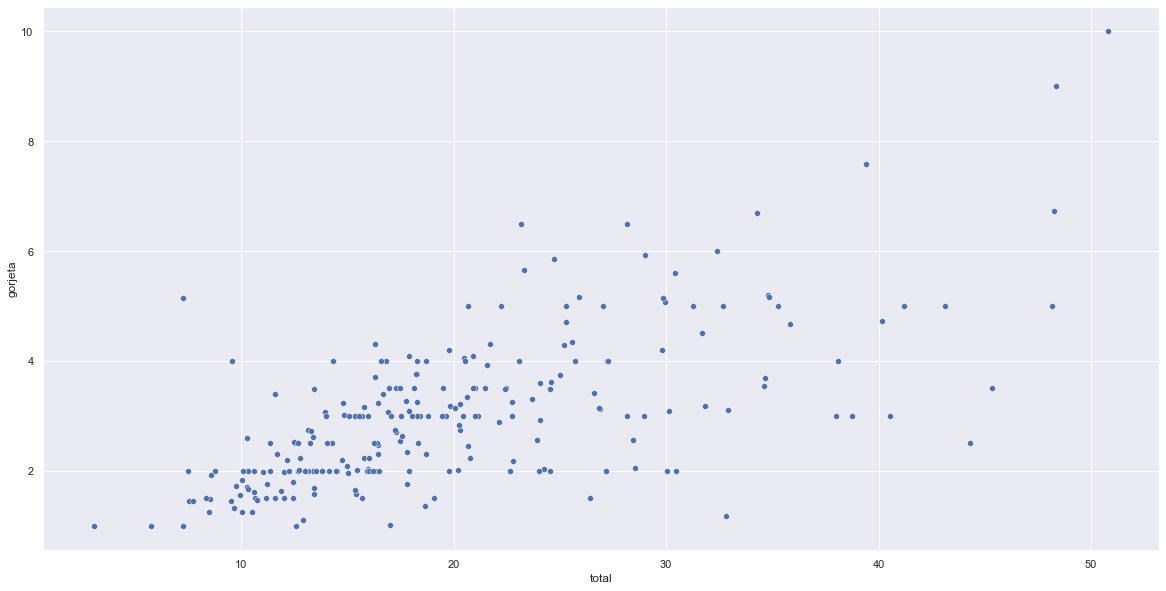

In [223]:
vxg = sns.scatterplot(x='total',y='gorjeta',data=gorjetas)
vxg#visualmente o valor da gorjeta aumenta com o valor da conta

In [224]:
gorjetas.shape[0]

244

In [225]:
gorjetas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   total            244 non-null    float64
 1   gorjeta          244 non-null    float64
 2   sobremesa        244 non-null    object 
 3   dia_da_semana    244 non-null    object 
 4   horario          244 non-null    object 
 5   num_de_clientes  244 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 11.6+ KB


## Criando o campo %

In [226]:
gorjetas['porcentagem'] = (gorjetas['gorjeta']/gorjetas['total']).round(3)
gorjetas

,total,gorjeta,sobremesa,dia_da_semana,horario,num_de_clientes,porcentagem
0,16.99,1.01,Não,Dom,Jantar,2,0.059
1,10.34,1.66,Não,Dom,Jantar,3,0.161
2,21.01,3.50,Não,Dom,Jantar,3,0.167
3,23.68,3.31,Não,Dom,Jantar,2,0.140
4,24.59,3.61,Não,Dom,Jantar,4,0.147
...,...,...,...,...,...,...,...
239,29.03,5.92,Não,Sab,Jantar,3,0.204
240,27.18,2.00,Sim,Sab,Jantar,2,0.074
241,22.67,2.00,Sim,Sab,Jantar,2,0.088
242,17.82,1.75,Não,Sab,Jantar,2,0.098


<AxesSubplot:xlabel='total', ylabel='porcentagem'>

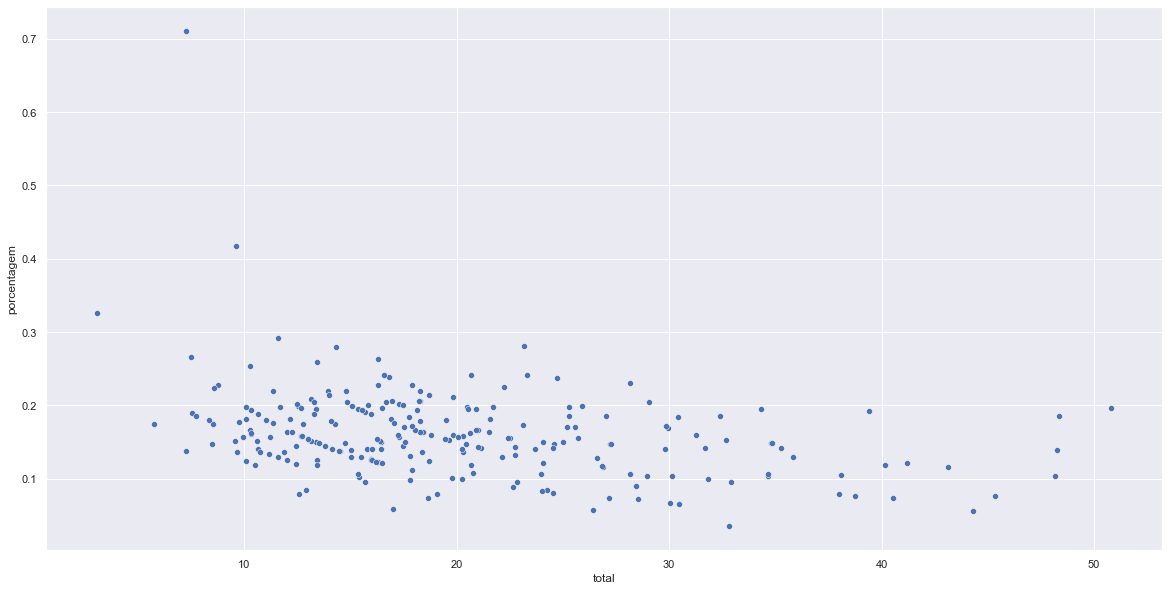

In [227]:
txp = sns.scatterplot(x='total',y='porcentagem',data=gorjetas)#scatterplot é o gráfico de dispersão, damos as coordenadas x, y e dataframe
txp#visualmente o valor não é proporcional ao aumento do valor da conta

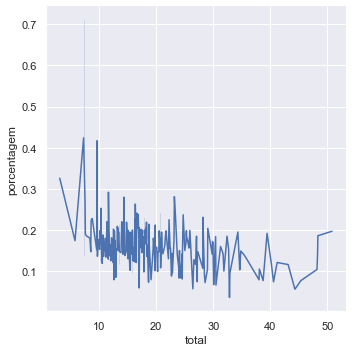

In [228]:
txp_linha = sns.relplot(x='total',y='porcentagem',kind = 'line',data=gorjetas)
txp_linha#relplot é o gráfico parecido, mas podemos colocar tipo = line

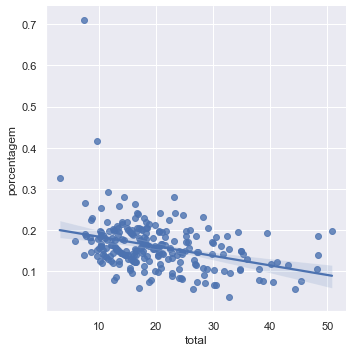

In [229]:
sns.lmplot(x='total',y='porcentagem',data=gorjetas)#lmplot adiciona linha de tendência

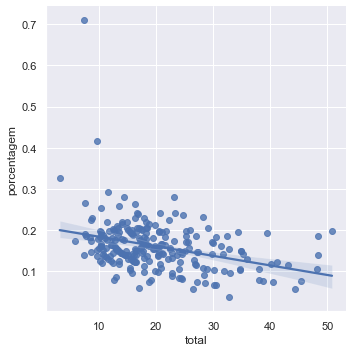

In [230]:
sns.lmplot(x='total',y='porcentagem',data=gorjetas)#lmplot adiciona linha de tendência

In [231]:
grafico

In [232]:
txp.figure.suptitle('% da gorjeta x total da conta')#adicionando subtitulo

Text(0.5, 0.98, '% da gorjeta x total da conta')

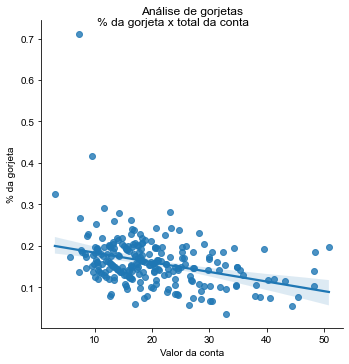

In [233]:
grafico.figure.get_figure()

In [234]:
grafico.set(title='Análise de gorjetas')#adicionando titulo
grafico.figure.suptitle('% da gorjeta x total da conta')#adicionando subtitulo

Text(0.5, 0.98, '% da gorjeta x total da conta')

In [235]:
grafico.set(xlabel='Valor da conta', ylabel='% da gorjeta')#descrevendo titulos dos eixos x e y

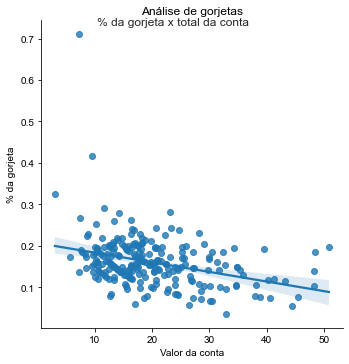

In [236]:
grafico.figure.get_figure()#como fazer o grafico apareer, importante adicionar o .figure

In [237]:
imagem = grafico.figure.get_figure()#atribuindo uma variável ao gráfico já visualizável

In [238]:
imagem.savefig('dados/imagem.png')#salvando o gráfico

# Comparando sobremesa x gorjeta

In [239]:
gorjetas[gorjetas.sobremesa == 'Sim'].describe()#descrevendo quem pediu sobremesa e pegando estátisticas gerais

,total,gorjeta,num_de_clientes,porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163226
std,9.832154,1.401468,0.810751,0.085093
min,3.070000,1.000000,1.000000,0.036000
25%,13.420000,2.000000,2.000000,0.107000
50%,17.920000,3.000000,2.000000,0.154000
75%,26.860000,3.680000,3.000000,0.195000
max,50.810000,10.000000,5.000000,0.710000


In [240]:
gorjetas[gorjetas.sobremesa == 'Não'].describe()#idem, não pediu

,total,gorjeta,num_de_clientes,porcentagem
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,0.159331
std,8.255582,1.377190,1.017984,0.039949
min,7.250000,1.000000,1.000000,0.057000
25%,13.325000,2.000000,2.000000,0.136500
50%,17.590000,2.740000,2.000000,0.156000
75%,22.755000,3.505000,3.000000,0.185000
max,48.330000,9.000000,6.000000,0.292000


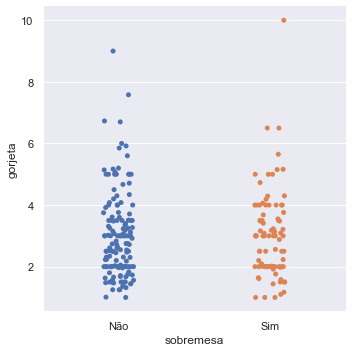

In [241]:
sns.catplot(x='sobremesa',y='gorjeta',data=gorjetas)#fazendo um gráfico

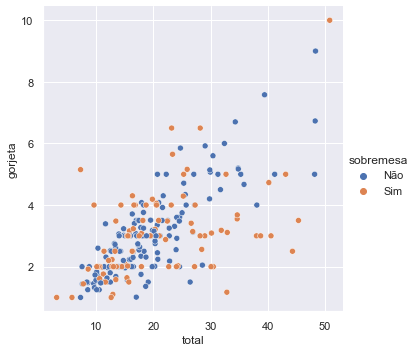

In [242]:
sns.relplot(x = 'total', y ='gorjeta', hue='sobremesa', data=gorjetas)#montando um gráfico com 2 eixos, hue adiciona cores diferentes a dados diferentes

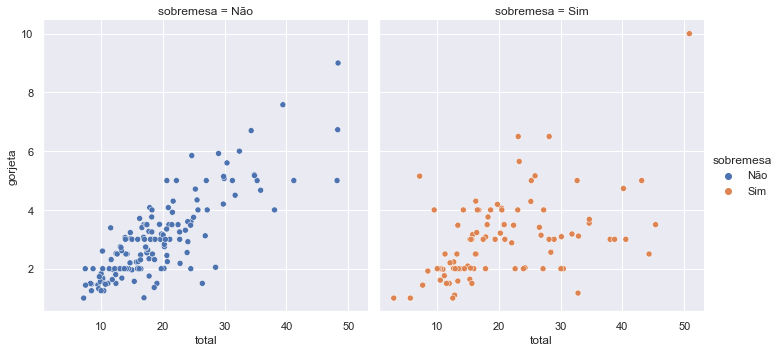

In [243]:
sns.relplot(x = 'total', y ='gorjeta', hue='sobremesa', col = 'sobremesa', data=gorjetas)#col = sobremesa adiciona um segundo gráfico, separando por sim ou não quanto pedir sobremesa

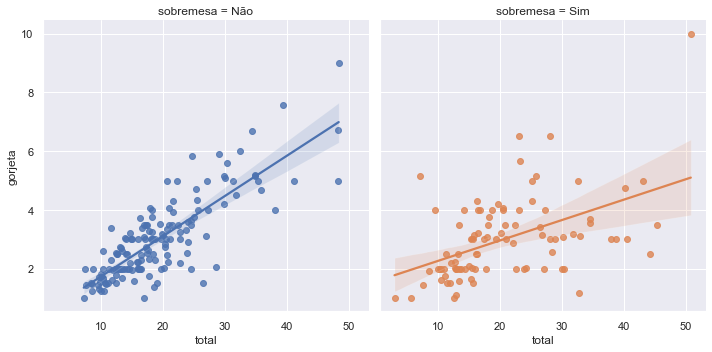

In [244]:
sns.lmplot(x = 'total', y ='gorjeta', hue='sobremesa', col = 'sobremesa', data=gorjetas)#lmplot adiciona umalinha

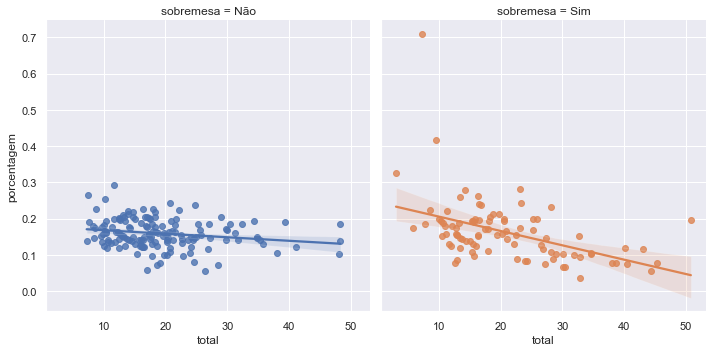

In [245]:
sns.lmplot(x = 'total', y ='porcentagem', hue='sobremesa', col = 'sobremesa', data=gorjetas)

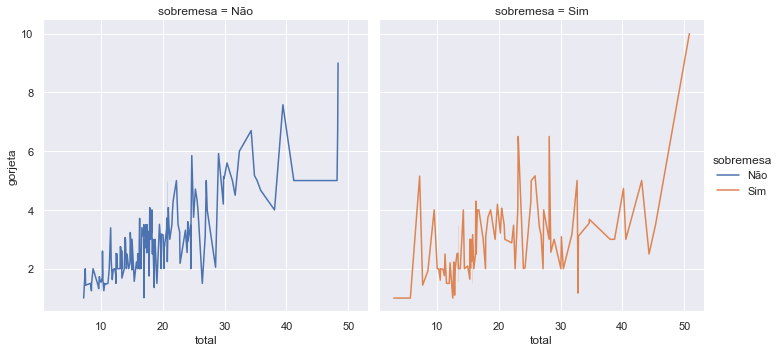

In [246]:
sns.relplot(x = 'total', y ='gorjeta', hue='sobremesa', col = 'sobremesa', kind ='line', data=gorjetas)#kind ='line' troca os pontos por linha

## Teste de hipotese

#### A distribuição da taxa da gorjeta é igual em ambos os grupos

In [247]:
from scipy.stats import ranksums#ranksums é utilizado para fazer comparações estatísticas

In [248]:
sobremesa_sim = gorjetas.query('sobremesa == "Sim"').porcentagem#selecionando quem pediu sobremesa com query
sobremesa_nao = gorjetas.query('sobremesa == "Não"').porcentagem#idem ~

In [249]:
ranksums(sobremesa_sim,sobremesa_nao)

RanksumsResult(statistic=-0.5714773989576214, pvalue=0.5676760764441404)

###### O Pvalue está muito alto, sendo assim, nossa hipotese não foi provada e não existe correlação significativa

In [250]:
gorjetas

,total,gorjeta,sobremesa,dia_da_semana,horario,num_de_clientes,porcentagem
0,16.99,1.01,Não,Dom,Jantar,2,0.059
1,10.34,1.66,Não,Dom,Jantar,3,0.161
2,21.01,3.50,Não,Dom,Jantar,3,0.167
3,23.68,3.31,Não,Dom,Jantar,2,0.140
4,24.59,3.61,Não,Dom,Jantar,4,0.147
...,...,...,...,...,...,...,...
239,29.03,5.92,Não,Sab,Jantar,3,0.204
240,27.18,2.00,Sim,Sab,Jantar,2,0.074
241,22.67,2.00,Sim,Sab,Jantar,2,0.088
242,17.82,1.75,Não,Sab,Jantar,2,0.098


## Análise III: Dia da Semana

In [255]:
sns.set(rc={'figure.figsize':(20,10)})#adequando o tamanho das imagens, estava pequeno
gorjetas.dia_da_semana.unique()#verificando dias da semana

array(['Dom', 'Sab', 'Qui', 'Sex'], dtype=object)

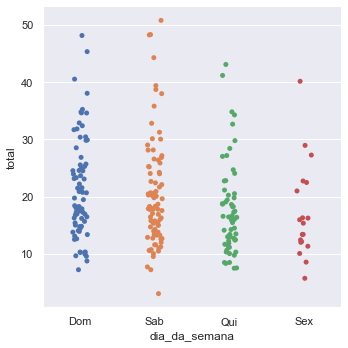

In [256]:
sns.catplot(x='dia_da_semana',y='total',data=gorjetas)#montando gráfico para verificar dispersão

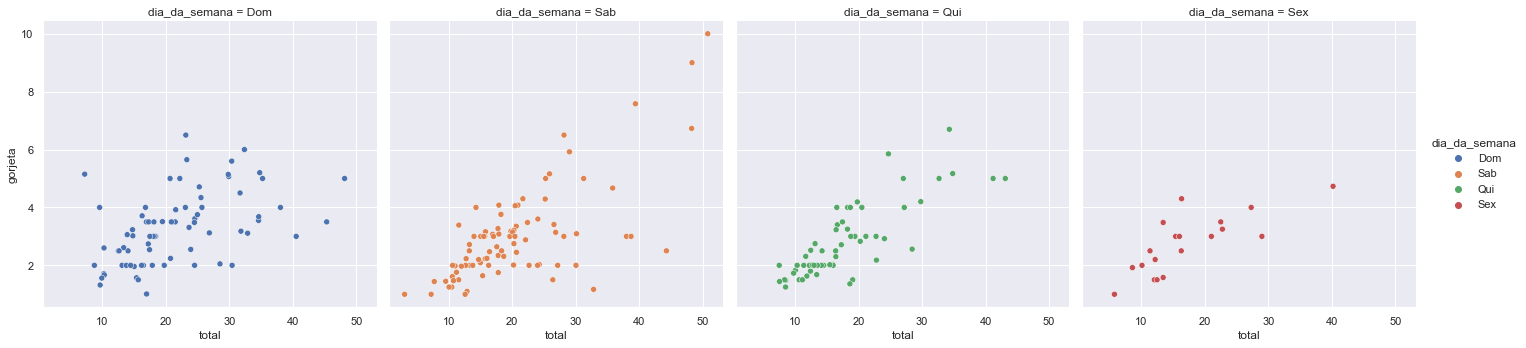

In [257]:
sns.relplot(x='total',y='gorjeta',hue='dia_da_semana',col = 'dia_da_semana',data=gorjetas)#separando e aplicando hue

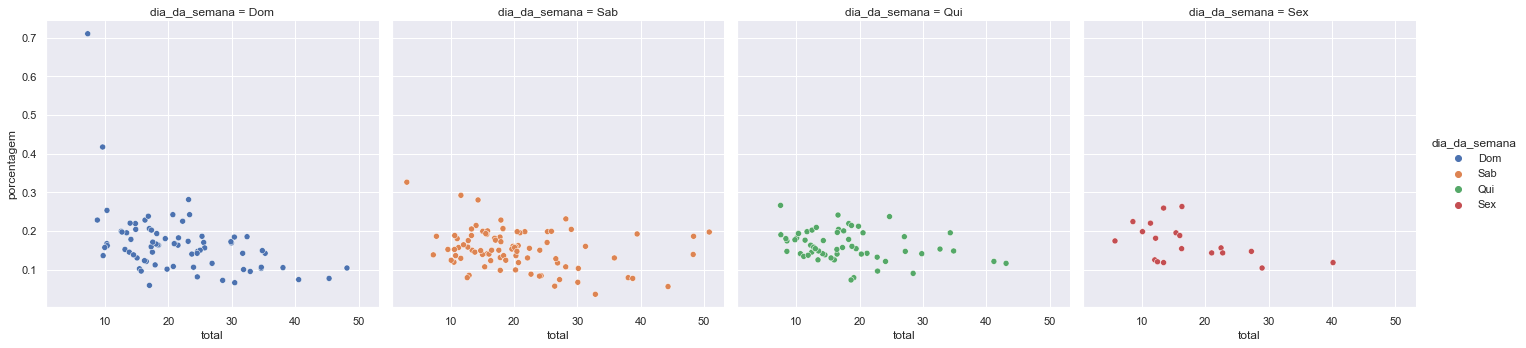

In [258]:
sns.relplot(x='total',y='porcentagem',hue='dia_da_semana',col = 'dia_da_semana',data=gorjetas)#verificando %

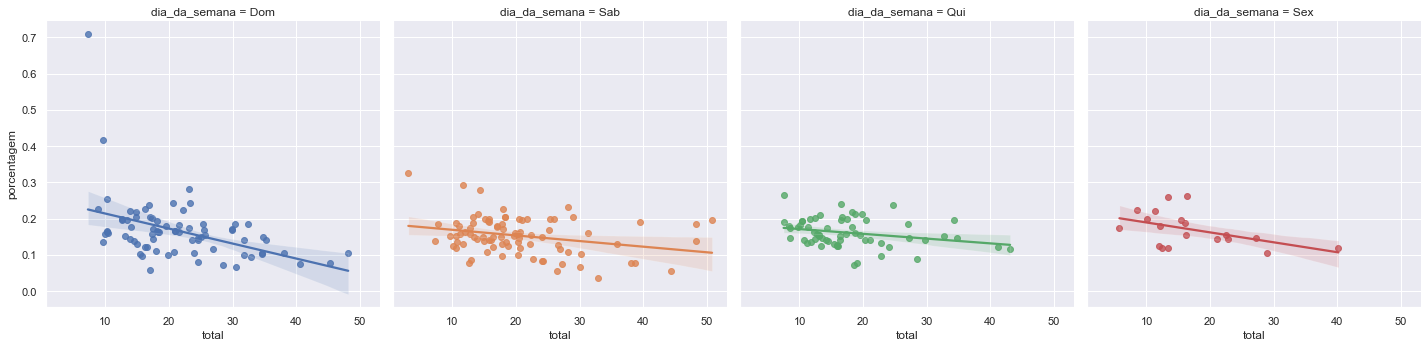

In [259]:
sns.lmplot(x='total',y='porcentagem',hue='dia_da_semana',col = 'dia_da_semana',data=gorjetas)#adicionando linhas

In [265]:
media_gorjetas = gorjetas['gorjeta'].mean()#verificando a média do campo

In [266]:
media_gorjetas

2.9982786885245902

In [268]:
gorjetas.groupby(['dia_da_semana']).mean()[['total','gorjeta','porcentagem']]#agrupando pela média, removi 1 coluna, na realidade só descrevi quais colunas quero ver

,total,gorjeta,porcentagem
dia_da_semana,,,
Dom,21.410000,3.255132,0.166921
Qui,17.682742,2.771452,0.161274
Sab,20.441379,2.993103,0.153149
Sex,17.151579,2.734737,0.170000


In [269]:
gorjetas.dia_da_semana.value_counts()#verificando quantas entradas em cada dia

Sab    87
Dom    76
Qui    62
Sex    19
Name: dia_da_semana, dtype: int64

### Teste de hipotese:
#### Hnull Distribuição do valor da conta é igual no sabado e domingo
#### Halt   Distribuição do valor da conta não é igual no sabado e domingo

In [272]:
conta_dom = gorjetas.query('dia_da_semana == "Dom"').total#separando clientes do domingo

In [274]:
conta_sab = gorjetas.query('dia_da_semana == "Sab"').total#separando clientes do sabado

In [275]:
ranksums(conta_dom, conta_sab)#teste de hipotese

RanksumsResult(statistic=0.9198084864360142, pvalue=0.3576728477868443)

#### A distribuição do valor da conta é semelhante no sabado e domingo(hnull)

## Análise IV: Gorjetas x refeição

In [280]:
gorjetas.head(1)

,total,gorjeta,sobremesa,dia_da_semana,horario,num_de_clientes,porcentagem
0,16.99,1.01,Não,Dom,Jantar,2,0.059


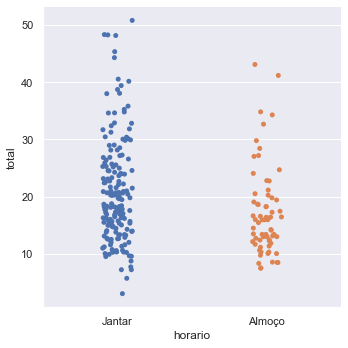

In [281]:
sns.catplot(x='horario',y='total',data=gorjetas)

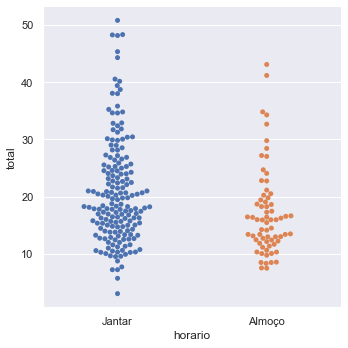

In [282]:
sns.catplot(x='horario',y='total',kind = 'swarm',data=gorjetas)#swarm agrupa os dados um pouco melhor

<AxesSubplot:xlabel='horario', ylabel='total'>

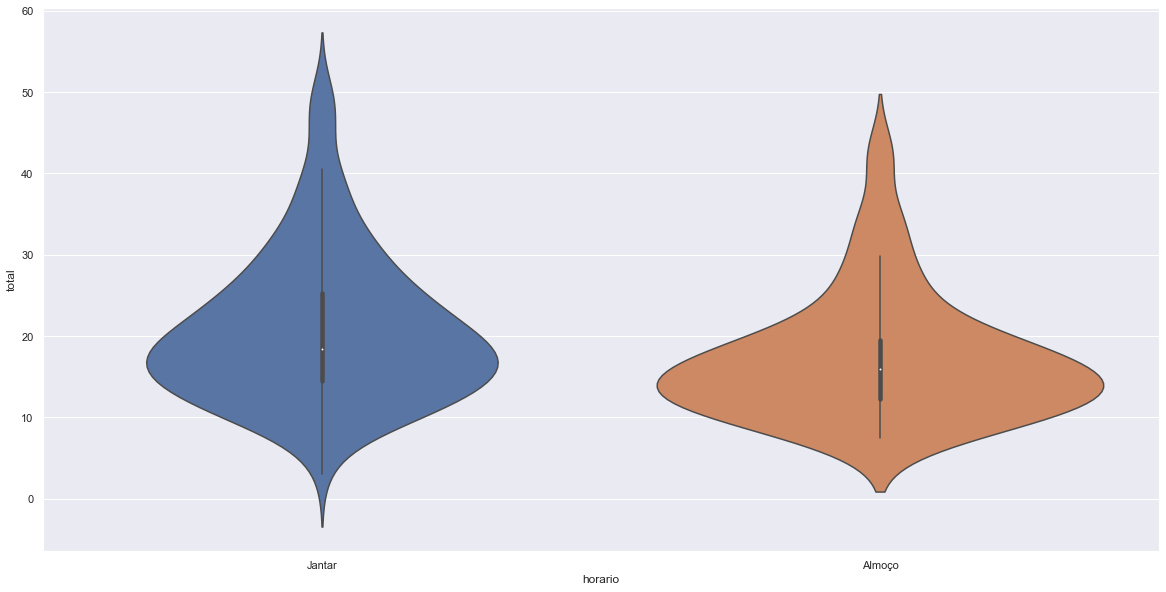

In [284]:
sns.violinplot(x='horario',y='total',data=gorjetas)#violinplot, sério?

<AxesSubplot:xlabel='horario', ylabel='total'>

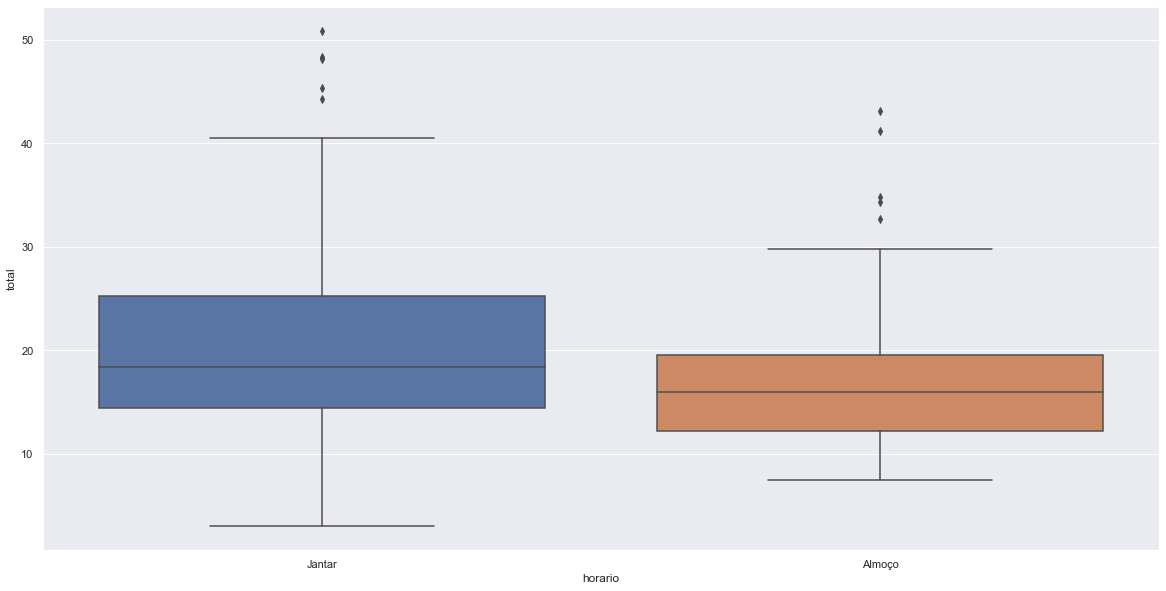

In [285]:
sns.boxplot(x='horario',y='total',data=gorjetas)#Boxplot

In [287]:
almoço = gorjetas.query('horario == "Almoço"').total#montando a query
jantar = gorjetas.query('horario == "Jantar"').total

C:\Users\flavi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total', ylabel='Density'>

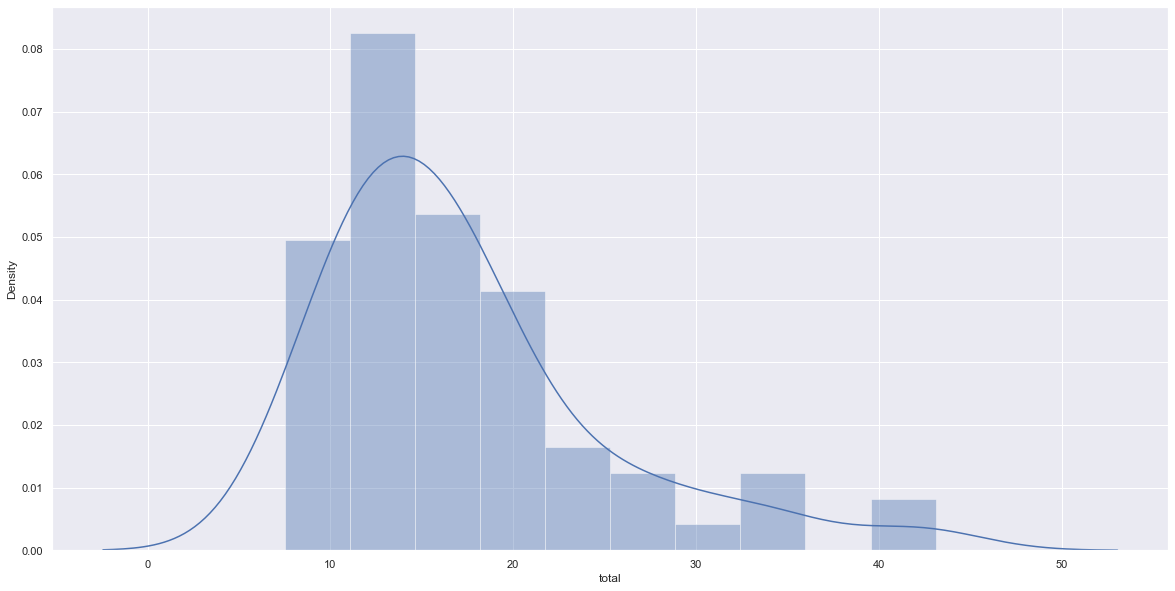

In [291]:
sns.distplot(almoço)

<AxesSubplot:xlabel='total'>

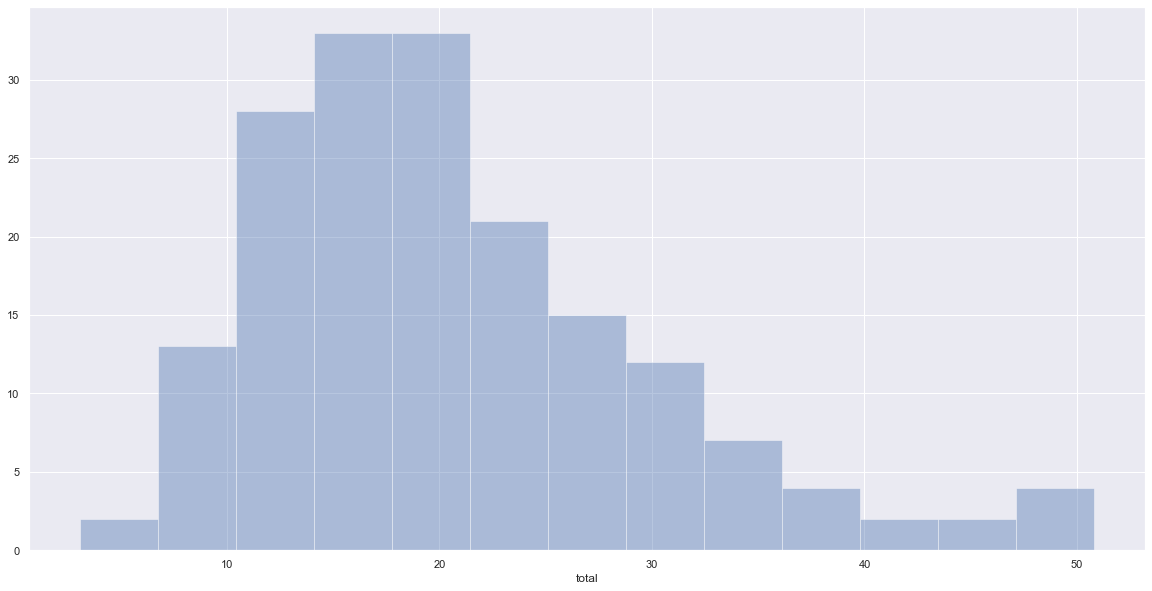

In [294]:
sns.distplot(jantar, kde=False)#kde desativa a linha caso False

In [297]:
gorjetas.groupby(['horario']).mean()[['total','gorjeta','porcentagem']]

,total,gorjeta,porcentagem
horario,,,
Almoço,17.168676,2.728088,0.164132
Jantar,20.797159,3.102670,0.159534


## Teste de hipotese
#### H<sup>null</sup> A distribuição é igual no jantar e almoço
#### H<sup>alt</sup> A distribuição não é igual no jantar e almoço

In [298]:
ranksums(jantar, almoço)

RanksumsResult(statistic=3.2438872807262955, pvalue=0.0011791039723641672)

In [299]:
ranksums(almoço, jantar)

RanksumsResult(statistic=-3.2438872807262955, pvalue=0.0011791039723641672)

## Pvalue < 0.05, hipotese alternativa testada
#### H<sup>alt</sup> A distribuição não é igual no jantar e almoço

In [301]:
almoço_p = gorjetas.query('horario == "Almoço"').porcentagem#Testando outra hipotese, por desencargo
jantar_p = gorjetas.query('horario == "Jantar"').porcentagem#não existe relação entre % e refeição
ranksums(almoço_p, jantar_p)

RanksumsResult(statistic=1.1996415076212619, pvalue=0.23027859883366675)